In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

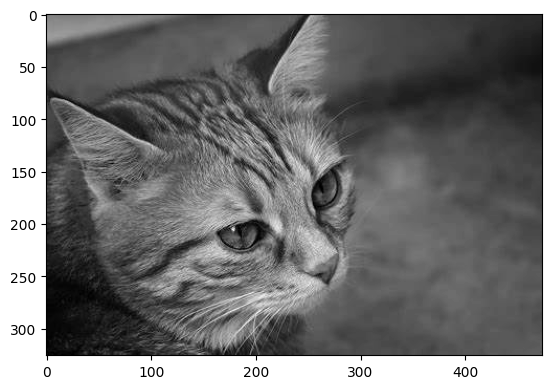

In [10]:
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

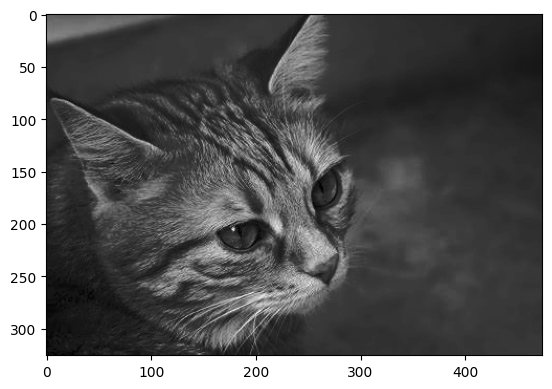

In [11]:
def contrast_stretch(image, s1, s2, r1, r2):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  alpha=s1/r1
  beta=(s2-s1)/(r2-r1)
  gamma=(255-s2)/(255-r2)
  for pixel in temp_image:
    if(pixel<r1):
      new_image.append(alpha*pixel)
    elif(pixel<r2 and pixel>=r1):
      new_image.append(beta*(pixel-r1)+s1)
    else:
      new_image.append(gamma*(pixel-r2)+s2)
  return np.array(new_image).reshape(og_shape)

cs=contrast_stretch(image, 20, 60, 10, 100)
plt.imshow(cs, cmap='gray')

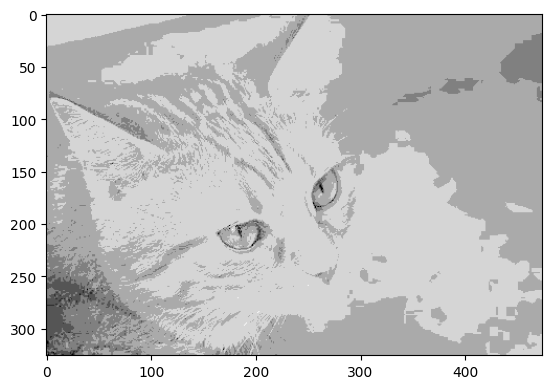

In [12]:
def log_transform(image, c):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  for pixel in temp_image:
    new_image.append(round(c*np.log(1+pixel)))
  return np.array(new_image).reshape(og_shape)

lt=log_transform(image, 1)
plt.imshow(lt, cmap='gray')

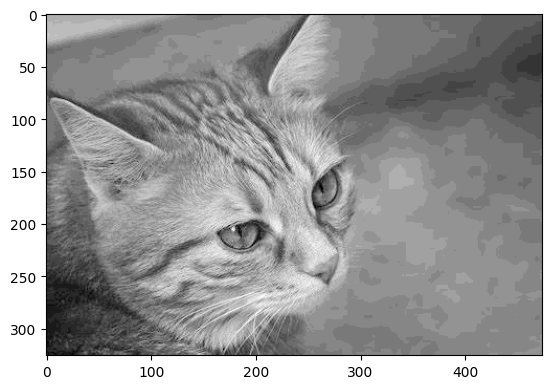

In [13]:
def power_transform(image, c, gamma):
  og_shape=image.shape
  temp_image=image.flatten()
  new_image=[]
  for pixel in temp_image:
    new_image.append(round(c*math.pow(pixel,gamma)))
  return np.array(new_image).reshape(og_shape)

pt=power_transform(image, 0.7, 0.6)
plt.imshow(pt, cmap='gray')